# Ejercicio 2
## Enunciado
A partir de la notebook "Ejemplo-Fashion-MNIST.ipynb" armar una serie de clasificadores bayesianos:
* 1) Todos los pixels tiene la misma distribución de probabilidades para cada clase de grises y se generan de manera independiente.
* 2) Se separa la imagen en cuatro cuadrantes y los pixels de cada cuadrante tienen la misma distribución de probabilidades para cada clase y se generan de manera independiente.
* Se pide estimar las probabilidades de niveles de grises para cada caso utilizando un subconjunto de entrenamiento de los datos y en función de esa estimación medir la performance del modelo con un subconjunto de validación

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
# %load MNIST_helper.py
import MNIST_helper as mh

In [4]:
folder = "./"
#Train data
trainImages = np.load(folder+'train_images.npy')
trainLabels = np.loadtxt(folder+'train_labels.csv', delimiter=',', skiprows=1,dtype=int)
#test data
testImages = np.load(folder+'test_images.npy')
testLabels = np.loadtxt(folder+'test_labels.csv', delimiter=',', skiprows=1)

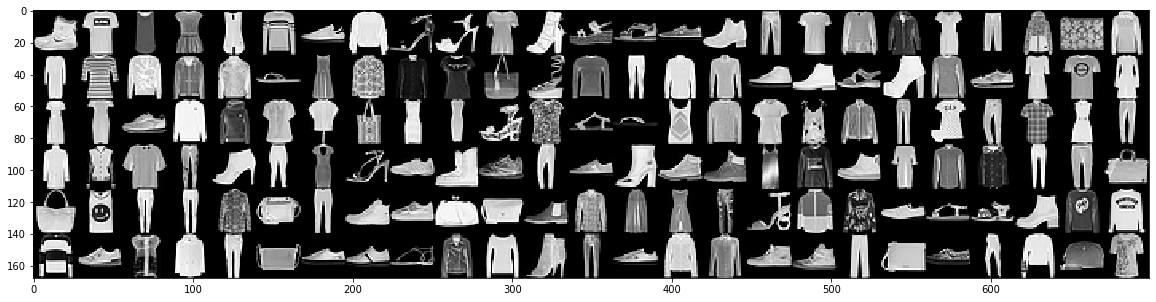

In [5]:
mh.plot_numbers(trainImages.reshape(-1,28,28),range(150), columns=25, figsize=(20, 20))

In [6]:
train_data = np.array(trainImages, dtype='int')
test_data = np.array(testImages, dtype='int')

x_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

In [7]:
x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=12345,
)

In [8]:
print('x_train: ', x_train.shape)
print('x_validate: ', x_validate.shape)
print('y_train: ', y_train.shape)
print('y_validate: ', y_validate.shape)
#Interpreto como 38400 imagenes de entrenamiento de 27X28
#Interpreto como 9600 imagenes de validación de 27X28
#Interpreto como 38400 labels de entrenamiento de 28
#Interpreto como 9600 labels de validación de 28

x_train:  (48000, 27, 28)
x_validate:  (12000, 27, 28)
y_train:  (48000, 28)
y_validate:  (12000, 28)


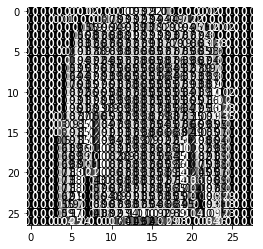

In [9]:
#Imprimo el primer objeto del arreglo de entrenamiento, 
#números del 0 al 255 porque así representa los colores
#Alta baias, mirando un histograma, no implica saber que tendrá el otro histograma.
x_train_1 = x_train[1]
mh.visualize_input(x_train_1,plt)
plt.show()

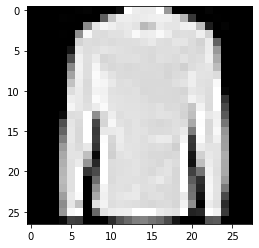

In [10]:
#Lo mismo que antes, pero con la imágen en escala de grises, no numerada
plt.imshow(x_train_1, cmap='gray')
plt.show()

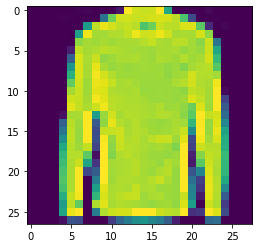

In [11]:
#Lo mismo pero sin escala de grises
plt.imshow(x_train_1)

In [12]:
#Divido el arreglo de entrenamiento en 4
mini_x_train= np.split(trainImages,4)
mini_x_train_1 = np.array(mini_x_train[0])
print('x_train1: ', mini_x_train_1.shape)
mini_x_train_2=np.array(mini_x_train[1])
print('x_train2: ', mini_x_train_2.shape)
mini_x_train_3=np.array(mini_x_train[2])
print('x_train3: ', mini_x_train_3.shape)
mini_x_train_4=np.array(mini_x_train[3])
print('x_train4: ', mini_x_train_4.shape)

x_train1:  (15000, 28, 28)
x_train2:  (15000, 28, 28)
x_train3:  (15000, 28, 28)
x_train4:  (15000, 28, 28)


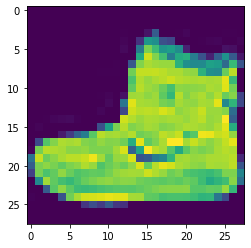

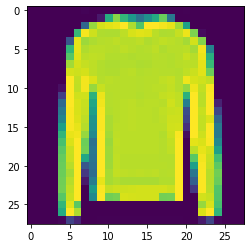

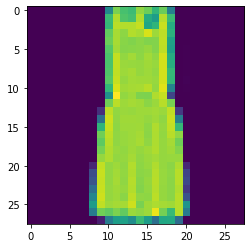

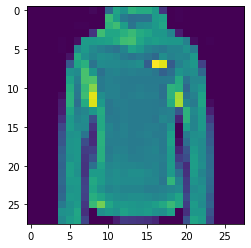

In [13]:
plt.imshow(mini_x_train_1[0])
plt.show()
plt.imshow(mini_x_train_2[0])
plt.show()
plt.imshow(mini_x_train_3[0])
plt.show()
plt.imshow(mini_x_train_4[0])
plt.show()

In [14]:
total_pixeles_imagen = mini_x_train_1[0].shape[0]*mini_x_train_1[0].shape[1]
print(total_pixeles_imagen)

784


In [15]:
div = 1
n = (mini_x_train_1/div).astype(int)
#Tomo todos los niveles de colores, del 0 a 256
niveles = np.max(n) + 1
print(niveles)
pixeles = list(range(niveles))

256


In [16]:
# Siempre uso pixel, porque asumo que para todas las ocurrencias siempre serán 256
# La funcion setHistogram recorre el arreglo completo, compara cada valor contra 
# un valor de pixel que va de 0 a 256, hace la sumatoria de las ocurrencias de cada uno
# y retorna el histograma completo.
hist1 = mh.setHistogram(mini_x_train_1,pixeles,total_pixeles_imagen,2)
hist2 = mh.setHistogram(mini_x_train_2,pixeles,total_pixeles_imagen,2)
hist3 = mh.setHistogram(mini_x_train_3,pixeles,total_pixeles_imagen,2)
hist4 = mh.setHistogram(mini_x_train_4,pixeles,total_pixeles_imagen,2)

NameError: name 'pixeles' is not defined

In [ ]:
plt.bar(pixeles, hist1)
plt.show()
plt.bar(pixeles, hist2)
plt.show()
plt.bar(pixeles, hist3)
plt.show()
plt.bar(pixeles, hist4)
plt.show()

In [17]:
# Grafico a partir del 1, para desestimar el negro 0
plt.bar(pixeles[1:], hist1[1:])
plt.show()
plt.bar(pixeles[1:], hist2[1:])
plt.show()
plt.bar(pixeles[1:], hist3[1:])
plt.show()
plt.bar(pixeles[1:], hist4[1:])
plt.show()

NameError: name 'hist1' is not defined

## Conclusión
No por haber partido el arreglo de manera equitativa en 4, las escalas de grises en los mismos son iguales, está claro que varían.

In [18]:
#Todo en 1
bins = np.linspace(0, 256, 256)
plt.hist([hist1, hist2,hist3,hist4], bins, label=['hist1', 'hist2','hist3','hist4'])
plt.legend(loc='upper right')
plt.show()

NameError: name 'hist1' is not defined

In [19]:
# Probabilidad de hallar un pixel negro en la posición 10 10 de todas las imágenes
p1_10_0 = (mini_x_train_1[:, 10, 10] == 0).sum()/mini_x_train_1.shape[0]
print(p1_10_0)
p2_10_0 = (mini_x_train_2[:, 10, 10] == 0).sum()/mini_x_train_1.shape[0]
print(p2_10_0)
p3_10_0 = (mini_x_train_3[:, 10, 10] == 0).sum()/mini_x_train_1.shape[0]
print(p3_10_0)
p4_10_0 = (mini_x_train_4[:, 10, 10] == 0).sum()/mini_x_train_1.shape[0]
print(p4_10_0)

0.25626666666666664
0.25366666666666665
0.25533333333333336
0.25606666666666666


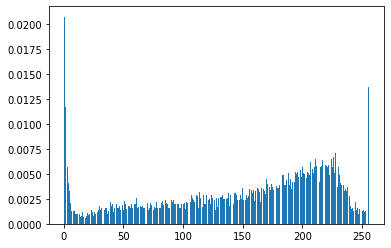

In [20]:
# Probabilidad de encontrar cualquier color dentro de los pixeles
p1_10_0_test = []
for pixel in pixeles:
    p1_10_0_test.append((mini_x_train_1[:, 10, 10] == pixel).sum()/mini_x_train_1.shape[0])
plt.bar(pixeles[1:], p1_10_0_test[1:])
plt.show()

In [21]:
# Probabilidad total de que un punto en la posición 10 10 sea 0
sum1= (mini_x_train_1[:, 10, 10]==0).sum()
sum2= (mini_x_train_2[:, 10, 10]==0).sum()
sum3= (mini_x_train_3[:, 10, 10]==0).sum()
sum4= (mini_x_train_4[:, 10, 10]==0).sum()
len1=len(mini_x_train_1)
len2=len(mini_x_train_2)
len3=len(mini_x_train_3)
len4=len(mini_x_train_4)

P1_10_0_total = (sum1+sum2 +sum3+sum4) / (len1+len2+len3+len4)
P1_10_0_total

0.25533333333333336

In [22]:
# Parto 1 histograma en 4
mini_mini_x_train = np.split(mini_x_train_1[0],4)
mini_mini_x_train_1 = np.array(mini_mini_x_train[0])
mini_mini_x_train_2 = np.array(mini_mini_x_train[1])
mini_mini_x_train_3 = np.array(mini_mini_x_train[2])
mini_mini_x_train_4 = np.array(mini_mini_x_train[3])
print('mini_mini_x_train_4: ', mini_mini_x_train_1.shape)

mini_mini_x_train_4:  (7, 28)


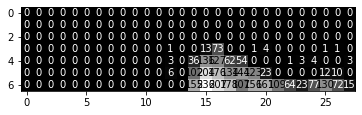

In [24]:
mh.visualize_input(mini_mini_x_train_1,plt)

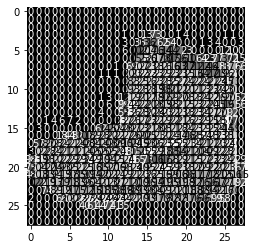

In [25]:
mh.visualize_input(mini_x_train_1[0],plt)

## RTA profesor

In [26]:
total_pixeles_imagen = trainImages[0].shape[0]*trainImages[0].shape[1]
print(total_pixeles_imagen)

784


In [27]:
div = 1
n = (trainImages[0]/div).astype(int)
#Tomo todos los niveles de colores, del 0 a 256
niveles = np.max(n) + 1
pixeles = list(range(niveles))

<BarContainer object of 256 artists>

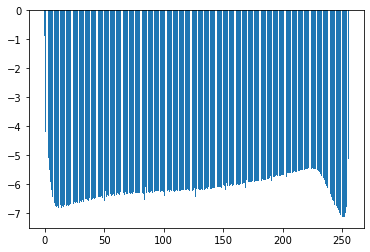

In [28]:
model_logprob,model_priori = mh.getHist(trainImages,trainLabels,0)
plt.bar(list(range(256)),model_logprob)

In [29]:
test_image = testImages[0]

In [30]:
hist_test = np.histogram(test_image.flatten(),bins=256,range=[0,256],density=False)[0]

In [31]:
np.dot(hist_test,model_logprob)+model_priori

-2335.825841294051

In [32]:
train_models = mh.fit(trainImages,trainLabels)

In [33]:
hists = mh.predict(test_image)
